# Entregable Final 

In [ ]:
#pip install openpyxl

In [ ]:
#pip install plotly

In [ ]:
#pip install xlrd

In [ ]:
#pip install statsmodels 

In [ ]:
#LO PRIMERO QUE HICE FUE INSTALAR ALGUNAS LIBRERIAS PARA QUE SE PUDERIERAN CORRER BIEN DURANTE EL TRABAJO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
import plotly.express as px

In [2]:
df = pd.read_csv("heartbien.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
1,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
2,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1


In [ ]:
#ESTA ES LA BASE DE DATOS CON LAS QUE SE TRABAJO DURANTE ESTE ANALISIS

In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
#DESPUES HICE UN CONTEO DE TODAS LAS CATEGORIAS DE LA BASE DE DATOS Y LOS TIPOS QUE SON, PODEMOS OBSERVAR QUE EXISTEN ENTEROS, FLOAT Y OBJECT

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#PODEMOS VER QUE NO EXISTEN VALORES EN BLANCO, POR LO QUE LA BASE DE DATOS ESTA COMPLETA

In [6]:
df.count()

Age               746
Sex               746
ChestPainType     746
RestingBP         746
Cholesterol       746
FastingBS         746
RestingECG        746
MaxHR             746
ExerciseAngina    746
Oldpeak           746
ST_Slope          746
HeartDisease      746
dtype: int64

In [ ]:
#AQUI SE CONTARON LOS DATOS QUE EXISTEN EN LA BASE DE DATOS

In [7]:
df.describe(include=[np.number])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#AL ESCOGER LA VARIABLE "CHOLESTEROL" QUE ES NUESTRA VARIABLE DE INTERES NOS PODEMOS DAR CUENTA QUE SUS RANGOS PUEDEN VARIAR POR CUALQUIER NUMERO ENTERO POSITIVO

In [8]:
x=(df["Age"])
y=(df["Cholesterol"])


In [9]:
type(x)
mpl.style.use("ggplot")

Text(0, 0.5, 'Colesterol')

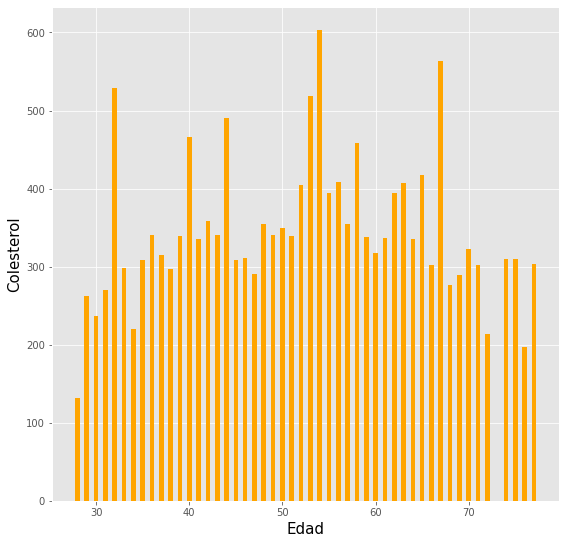

In [18]:
plt.subplot(2,2,1)
plt.rcParams["figure.figsize"]=(30,20)
plt.bar(x,y,
        width=0.5,
       color="orange")
plt.xlabel("Edad", fontweight="regular", color="black",
          fontsize=15, horizontalalignment="center")
plt.ylabel("Colesterol", fontweight="regular", color="black",
          fontsize=15, horizontalalignment="center")        

In [ ]:
#EN ESTA GRAFICA PODEMOS VER UN PROMEDIO QUE ENTRE LOS 40 Y 60 AÑOS DE EDAD ES EN DONDE MAS ALTO EL NIVEL 
#DE COLESTEROL SE PRESENTA, ADEMAS DE OBSERVAR LOS DATOS ATIPICOS 

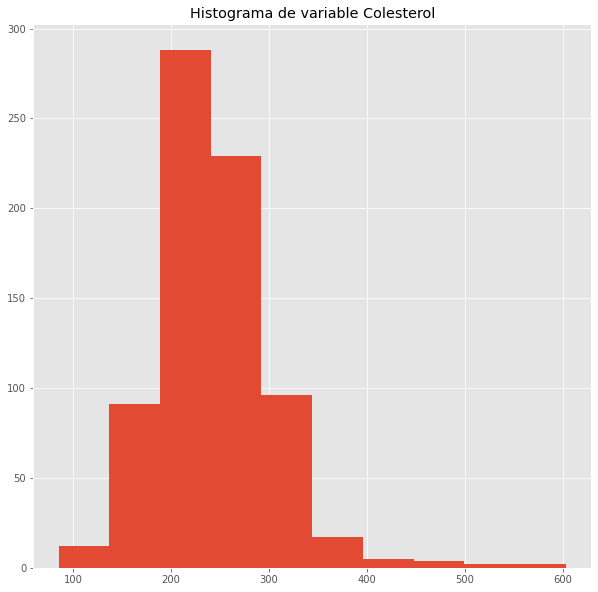

In [11]:
plt.title('Histograma de variable Colesterol')
plt.hist(df['Cholesterol'])


plt.show()

In [ ]:
#REALICE UN HISTOGRAMA DE EL COLESTEROL Y EFECTIVAMENTE LA MAYOR CANTIDAD DE PERSONAS TIENE UN NIVE DE ENTRE 200 Y 300 DE COLESTEROL EN EL CORAZON

In [12]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


In [ ]:
#PODEMOS OBSERVAR QUE LAS VARIABLES TIENEN MUY POCA CORRELACION ENTRE ELLAS, POR LO QUE NO EXISTIRIA UNA LINEA DE TENDENCIA PARA LA VARIABLE COLESTEROL
#SIN EMBARGO AL COMPARAR COLESTEROL CON EDAD PODEMOS OBSERVAR EL PROMEDIO DE PERSONAS CON COLESTEROL 

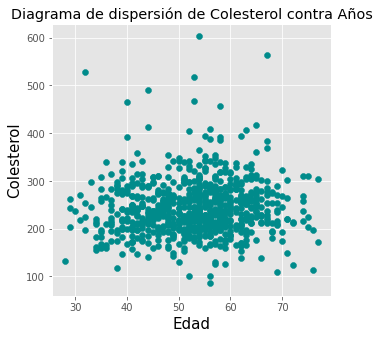

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x = df["Age"], y = df["Cholesterol"],
           color="darkcyan")
plt.xlabel("Edad", fontweight="regular", color="black",
          fontsize=15, horizontalalignment="center")
plt.ylabel("Colesterol", fontweight="regular", color="black",
          fontsize=15, horizontalalignment="center")
plt.title("Diagrama de dispersión de Colesterol contra Años")
plt.show()

In [ ]:
#EN ESTE DIAGRAMA DE DISPERSION NOS PODEMOS DAR CUENTA QUE LA MAYORIA DE DATOS ESTA EN EL CENTRO DEL DIAGRAMA
#POR LO QUE NOS DAMOS CUENTA QUE ENTRE LOS 50 Y 60 ES LA EDAD QUE MAS PERSONAS PRESENTAN COLESTEROL EN UN PROMEDIO DE 200 A 300

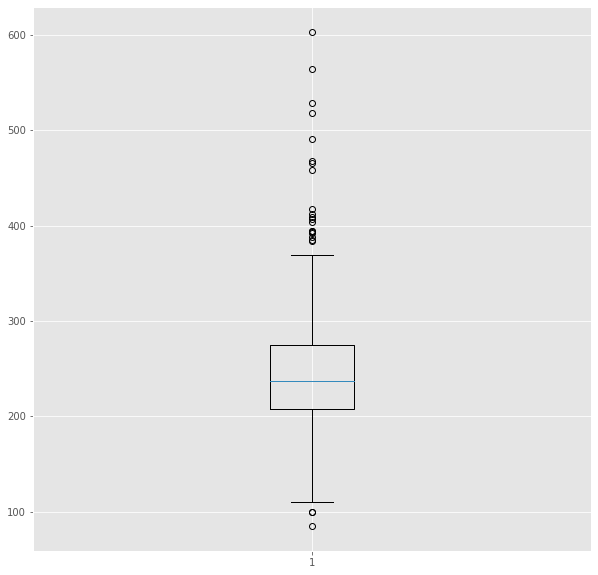

In [14]:
plt.boxplot(df["Cholesterol"])
           
plt.show()

In [ ]:
#ASI MISMO EN EL DIAGRAMA DE CAJA NOS DAMOS CUENTA DEL PROMEDIO DE COLESTEROL QUE ESTAS PERSONAS PRESENTAN
#ASI TAMBIEN COMO LOS DATOS ATIPICOS 

In [19]:
AgeCH = df[["Age","Cholesterol",]]

model_ols = sm.OLS.from_formula("Cholesterol ~Age", data=AgeCH)

result = model_ols.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.578
Date:                Thu, 21 Oct 2021   Prob (F-statistic):              0.109
Time:                        06:07:42   Log-Likelihood:                -4100.5
No. Observations:                 746   AIC:                             8205.
Df Residuals:                     744   BIC:                             8214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    225.2995     12.236     18.412      0.0

In [ ]:
#AL IGUAL QUE SE MENCIONO ANTERIORMENTE LA BASE DE DATOS NO PRESENTA UN TENDENCIA EN LOS DATOS, POR LO QUE PUEDO CONCLUIR QUE NO ES UN MODELO PRECISO
#SIN EMBARGO SE PUDO HACER UN ANALISIS DE LA VARIABLE "CHOLESTEROL" Y COMO ES QUE SE PRESENTA EN CADA EDAD  

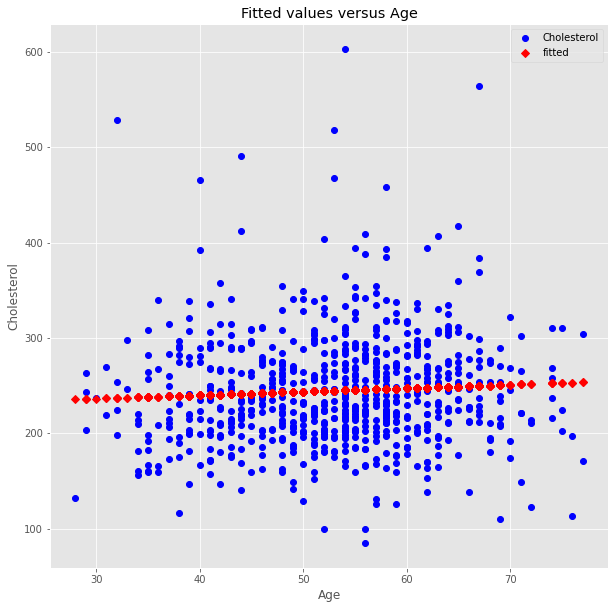

In [16]:
sm.graphics.plot_fit(result,1, vlines=False);

In [ ]:
#AQUI PODEMOS VER LA LINEA DE TENDENCIA LA CUAL NO PRESENTA NINGUN CAMBIO A LO LARGO DEL TIEMPO, PODEMOS OBSEVAR QUE ESTA CASI RECTA LO QUE INDICA QUE LOS DATOS POR PROMEDIO SERAN LOS MISMOS.
#EN CONCLUSION ME GUSTARIA DECIR QUE ESTE EJERCICIO ME AYUDO A PODER ENTENDER EL PROGRAMA Y PODER ANALISAR LOS DATOS DE UNA MEJOR MANERA
